In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/raheen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/raheen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import matplotlib.pyplot as plt

import pandas as pd
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from IPython.display import display

In [4]:
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 1.7 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [5]:
pd.set_option('display.max_colwidth', None)

try:
    df = pd.read_csv("dataset.csv")
except FileNotFoundError:
    print("Error: Could not read the dataset.csv file")

print("First Five Rows of the Dataset:")
display(df.head())

First Five Rows of the Dataset:


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [6]:
print("\nDataset information")
df.info()

print("Sentiment distribution")
print(df['sentiment'].value_counts())

# Load stop words
stop_words = set(stopwords.words('english'))
print("\nSample stopwords:")
print(list(stop_words)[:10])


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
Sentiment distribution
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Sample stopwords:
['if', 'y', 'my', "they'd", "i've", 'they', "she's", 'had', 'does', "you're"]


In [7]:
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = text.lower()                # Lowercase the text
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation/numbers
    tokens = word_tokenize(text)       # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    text = ' '.join(tokens)            # Join back to string
    doc = nlp(text)                    # spaCy processing
    lemmatized_tokens = [token.lemma_ for token in doc]  # Lemmatize
    return ' '.join(lemmatized_tokens)


In [8]:
# Preprocess
print("Preprocessing all 500 reviews....")
df = df.sample(500).copy()
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("Preprocessing complete!")
print("\nComparing Original vs Cleaned Reviews:")
display(df[['review', 'cleaned_review']].head())

Preprocessing all 500 reviews....
Preprocessing complete!

Comparing Original vs Cleaned Reviews:


,review,cleaned_review
18202,"There are so many '10 Best' lists which could easily fit ""The Dead"" - Best Screen Drunk, Best Literary Adaptation, Best Use Of Music Not Specifically Written for the Film, Best Use of Poetry, Best Screen Speech, Best Ensemble Cast and finally, perhaps, Best Film Ever Made. This was John Huston's last and greatest film, adapted by his son Tony from James Joyce's short story and set on the evening of the Feast of the Epiphany in the Dublin of 1904. It is confined, largely, to one setting, the home of the Morkan sisters, and not a great deal happens in conventional 'dramatic' terms. They entertain their guests; there is singing, dancing, recitations and much small talk but watching this film you can't imagine anywhere else you would rather be than in this company.<br /><br />Finally, of course, it is 'about' much, much more. It is about love, loss and regret, those stable mainstays of great drama. In the film's closing scenes the tenor Bartell D'Arcy, (Frank Patterson), sings a song, 'The Lass of Aughrim' which conjures up in the mind of Gretta, (Anjelica Huston), wife of Gabriel, (Donal McCann), the ghost of her first and probably greatest love, a boy who died in all certainty of a broken heart at the age of seventeen, and suddenly Gabriel realises he has never really known his wife and that he has not been the great love of her life, after all. Emotionally, these scenes are incredibly powerful, firstly as Gretta recounts the circumstances of her lover's death and then as the voice in Gabriel's head sums up his own feelings. This is great cinema, the monologues superbly delivered by Huston and McCann.<br /><br />But then all the performances are extraordinary. This is ensemble playing of the highest order and while it would be invidious to single out one performer above another, has the screen ever given us a more likable, genial or convincing drunk than Donal Donnelly or has poetry ever been delivered with such passion that Sean McClory, (the IRA man in ""The Quiet Man""), brings to his reading of Lady Gregory's translation of 'Donal Og' here? Added poignancy is to be had, of course, from the knowledge that Huston himself was close to death when he made this film which seems to me the culmination of his life's work. Death may well be its central theme but viewing this film is a life-enhancing experience.",many good list could easily fit dead good screen drunk good literary adaptation good use music specifically write film good use poetry good screen speech good ensemble cast finally perhaps good film ever make john huston last great film adapt son tony james joyces short story set evening feast epiphany dublin confine largely one set home morkan sister great deal happen conventional dramatic term entertain guest singe dancing recitation much small talk watch film can not imagine anywhere else would rather companyfinally course much much love loss regret stable mainstay great drama film closing scene tenor bartell darcy frank patterson sing song lass aughrim conjure mind gretta anjelica huston wife gabriel donal mccann ghost first probably great love boy die certainty break heart age seventeen suddenly gabriel realises never really know wife great love life emotionally scene incredibly powerful firstly gretta recount circumstance lover death voice gabriel head sum feeling great cinema monologue superbly deliver huston mccannbut performance extraordinary ensemble play high order would invidious single one performer another screen ever give we likable genial convincing drunk donal donnelly poetry ever deliver passion sean mcclory ira man quiet man bring read lady gregorys translation donal og add poignancy course knowledge huston close death make film seem culmination life work death may well central theme view film lifeenhancing experience
28555,"Need I say--its a stinker! (I gave it a rating of 2)<br /><br />Only watch it if you suffer from insomnia.<br /><br />There's plenty of scenery chewing an

In [9]:
from sklearn.model_selection import train_test_split
df['sentiment_numeric'] = df['sentiment'].map({'positive':1,'negative':0})
X= df['cleaned_review']
y=df['sentiment_numeric']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42,stratify=y)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Training set size: 400
Testing set size: 100


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
# max_features=5000 means we only use the 5000 most common words, which is efficient
tfidf = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# ONLY transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print(f"Shape of the training TF-IDF matrix: {X_train_tfidf.shape}")
print(f"Shape of the testing TF-IDF matrix: {X_test_tfidf.shape}")

Shape of the training TF-IDF matrix: (400, 5000)
Shape of the testing TF-IDF matrix: (100, 5000)


In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
# solver='liblinear' is a good choice for this type of problem
model = LogisticRegression(solver='liblinear')
model.fit(X_train_tfidf, y_train)

print("Model training complete!")
def predict_sentiment(text):
    """
    Takes a raw text string and predicts its sentiment using the trained model.
    """
    # 1. Preprocess the text using the same function from Cell 2
    cleaned_text = preprocess_text(text)
    
    # 2. Vectorize the text using the SAME fitted TF-IDF vectorizer from Cell 5
    vectorized_text = tfidf.transform([cleaned_text])
    
    # 3. Predict using the trained model from Cell 6
    prediction = model.predict(vectorized_text)
    
    # 4. Return the human-readable result
    return 'Positive' if prediction[0] == 1 else 'Negative'

# --- Test Cases ---
review_1 = "This movie was absolutely fantastic! The acting was superb and the plot was gripping."
review_2 = "I was so bored throughout the entire film. It was a complete waste of time and money."
review_3 = "The film was okay, not great but not terrible either. Some parts were good."
print(f"Review: '{review_1}'\nPredicted Sentiment: {predict_sentiment(review_1)}\n")
print(f"Review: '{review_2}'\nPredicted Sentiment: {predict_sentiment(review_2)}\n")
print(f"Review: '{review_3}'\nPredicted Sentiment: {predict_sentiment(review_3)}\n")

Model training complete!
Review: 'This movie was absolutely fantastic! The acting was superb and the plot was gripping.'
Predicted Sentiment: Positive

Review: 'I was so bored throughout the entire film. It was a complete waste of time and money.'
Predicted Sentiment: Negative

Review: 'The film was okay, not great but not terrible either. Some parts were good.'
Predicted Sentiment: Positive



Model Accuracy: 0.7400

Classification Report:
              precision    recall  f1-score   support

    Negative       0.71      0.85      0.77        52
    Positive       0.79      0.62      0.70        48

    accuracy                           0.74       100
   macro avg       0.75      0.74      0.73       100
weighted avg       0.75      0.74      0.74       100



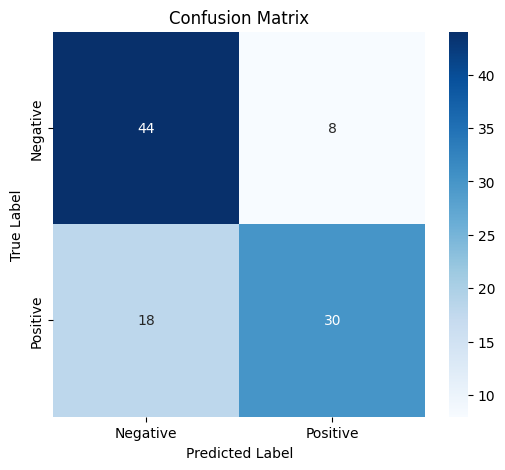

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Print the detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()